/tmp/ipython-input-3-1099592310.py:30: UserWarning: Argument(s) 'max_holes, max_height, max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=5, max_height=20, max_width=20, fill_value=0, p=0.3),
/tmp/ipython-input-3-1099592310.py:31: UserWarning: Argument(s) 'always_apply' are not valid for transform Normalize
  A.Normalize(always_apply=True)
/tmp/ipython-input-3-1099592310.py:34: UserWarning: Argument(s) 'always_apply' are not valid for transform Normalize
  normalize_only = A.Compose([A.Normalize(always_apply=True)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🔍 Prediction: Glasses (92.09%)


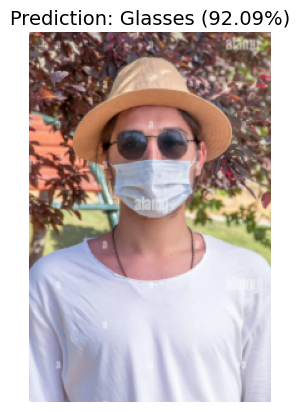

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import albumentations as A
from albumentations.core.composition import OneOf
from tensorflow.keras.models import load_model

    # Loading the Model
model = load_model("/content/mobilenet_glasses_model.h5")

    # Transformation of the Images
transform = A.Compose([
    OneOf([
        A.MotionBlur(p=0.3),
        A.GaussianBlur(p=0.3),
        A.MedianBlur(blur_limit=3, p=0.3)
    ], p=0.4),
    A.RandomBrightnessContrast(p=0.4),
    A.HorizontalFlip(p=0.5),
    A.CLAHE(p=0.3),
    A.GaussNoise(p=0.2),
    A.CoarseDropout(max_holes=5, max_height=20, max_width=20, fill_value=0, p=0.3),
    A.Normalize(always_apply=True)
])

normalize_only = A.Compose([A.Normalize(always_apply=True)])

    # Predict Glasses Outline
def predict_glasses(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Unable to read image.")
        return

    img_resized = cv2.resize(img, (224, 224))
    img_norm = normalize_only(image=img_resized)['image']
    img_input = np.expand_dims(img_norm, axis=0)

    pred = model.predict(img_input)[0]
    class_names = ["No Glasses", "Glasses"]
    label = class_names[np.argmax(pred)]
    confidence = pred[np.argmax(pred)] * 100

    # Print prediction result
    print(f"🔍 Prediction: {label} ({confidence:.2f}%)")

    # Show image with label
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Prediction: {label} ({confidence:.2f}%)", fontsize=14)
    plt.show()


    # Predict Image Test
predict_glasses('/content/Screenshot 2025-07-15 092856.png')


